In [1]:
# LAB 6 REALIZADO POR JORGE CIBRIÁN 20211021058
# 01 agosto 2024

In [3]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
w=symbols('w') # para escribir la función con sympy

In [4]:
#### EJERCICIO 2 ####

In [7]:
M=800          # en kg
k=7E4          # en N/m

w0=sqrt(k/M) 
z1=0.05 # primer valor del parámetro
z2=1 # segundo valor del parámetro

H1=((w0)**2+2*z1*w0*(I*w))/((w0)**2+2*z1*w0*(I*w)+(I*w)**2) #primer H
H2=((w0)**2+2*z2*w0*(I*w))/((w0)**2+2*z2*w0*(I*w)+(I*w)**2) #segundo H

#### AMPLITUD ####

Amp1=lambdify(w,20*log(abs(H1),10),'numpy') # primer espectro de amplitud
Amp2=lambdify(w,20*log(abs(H2),10),'numpy') # segundo espectro de amplitud

val_w = np.linspace(0.6,float(10*w0),1000) # 0 < w < 10*w0
eje_vert1a = Amp1(val_w) # 20*log(Amp1)
eje_vert2a = Amp2(val_w) # 20*log(Amp2)

#### FASE ####

Amp1=lambdify(w,arg(H1),'numpy') # primer espectro de fase
Amp2=lambdify(w,arg(H2),'numpy') # segundo espectro de fase

val_w = np.linspace(0.6,float(10*w0),1000) # 0 < w < 10*w0
eje_vert1b = Amp1(val_w) # arg(H1)
eje_vert2b = Amp2(val_w) # arg(H2)

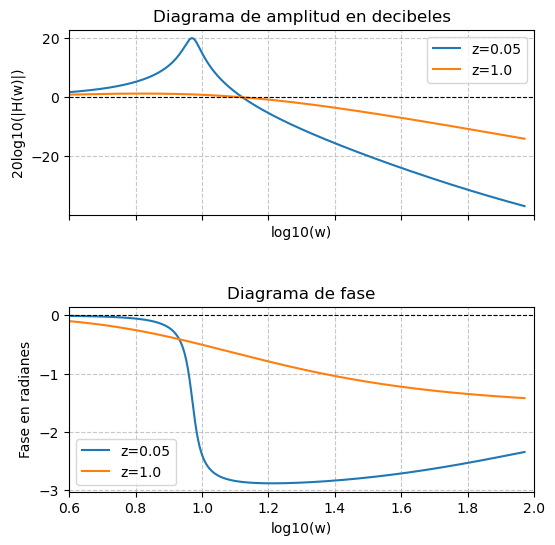

In [9]:
fig, ejes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
(p0,p1) = ejes.flatten()

p0.plot(np.log10(val_w), eje_vert1a, label='z=0.05')
p0.plot(np.log10(val_w), eje_vert2a, label='z=1.0')
plt.xlim([0.6,2]);p0.legend();p0.axhline(0, color='black', linewidth=0.8, linestyle='--')
p0.axvline(0, color='black', linewidth=0.8, linestyle='--');p0.grid(True, linestyle='--', alpha=0.7)
p0.set_title('Diagrama de amplitud en decibeles');p0.set_xlabel('log10(w)');p0.set_ylabel('20log10(|H(w)|)')

p1.plot(np.log10(val_w), eje_vert1b, label='z=0.05')
p1.plot(np.log10(val_w), eje_vert2b, label='z=1.0')
p1.legend();p1.axhline(0, color='black', linewidth=0.8, linestyle='--')
p1.axvline(0, color='black', linewidth=0.8, linestyle='--');p1.grid(True, linestyle='--', alpha=0.7)
p1.set_title('Diagrama de fase');p1.set_xlabel('log10(w)');p1.set_ylabel('Fase en radianes')

plt.subplots_adjust(hspace=0.5);plt.show()

In [11]:
#### EJERCICIO 3 ####

In [125]:
from scipy import signal as sc
w,z=symbols('w z') # para escribir la función con sympy
t = np.linspace(0,100,2048)

# Definiendo z=iw para facilitar el proceso, entonces:

H1=((w0)**2+2*z1*w0*(z))/((w0)**2+2*z1*w0*(z)+(z)**2)
H2=((w0)**2+2*z2*w0*(z))/((w0)**2+2*z2*w0*(z)+(z)**2)
s=solve(denom(H1))
s1=(float(re(s[0]))+float(im(s[0]))*1j);s2=(float(re(s[1]))+float(im(s[1]))*1j)
h1a=(w0**2+2*z1*w0*s1)/(s1-s2)*np.exp(s1*t)
h1b=(w0**2+2*z1*w0*s2)/(s2-s1)*np.exp(s2*t)


h1=h1a+h1b # respuesta al impulso h(t), cuando z=0.05

h2=-(w0)**2*t*np.exp(-w0*t)+2*w0*np.exp(-w0*t) # respuesta al impulso h(t), cuando z=1

In [90]:
#### EJERCICIO 4 ####

In [129]:
# Evaluando w=0.1*w0
w_1=0.5*w0
x_t1=np.cos(w_1*t)

y_t1a=sc.convolve(h1,x_t1,'same')
y_t1b=sc.convolve(h2,x_t1,'same')

# Evaluando w=w0
w_2=w0
x_t2=np.cos(w_2*t)

y_t2a=sc.convolve(x_t2,h1,'same')
y_t2b=sc.convolve(x_t2,h2,'same')

# Evaluando w=10*w0
w_3=10*w0
x_t3=np.cos(w_3*t)

y_t3a=sc.convolve(x_t3,h1,'same')
y_t3b=sc.convolve(x_t3,h2,'same')

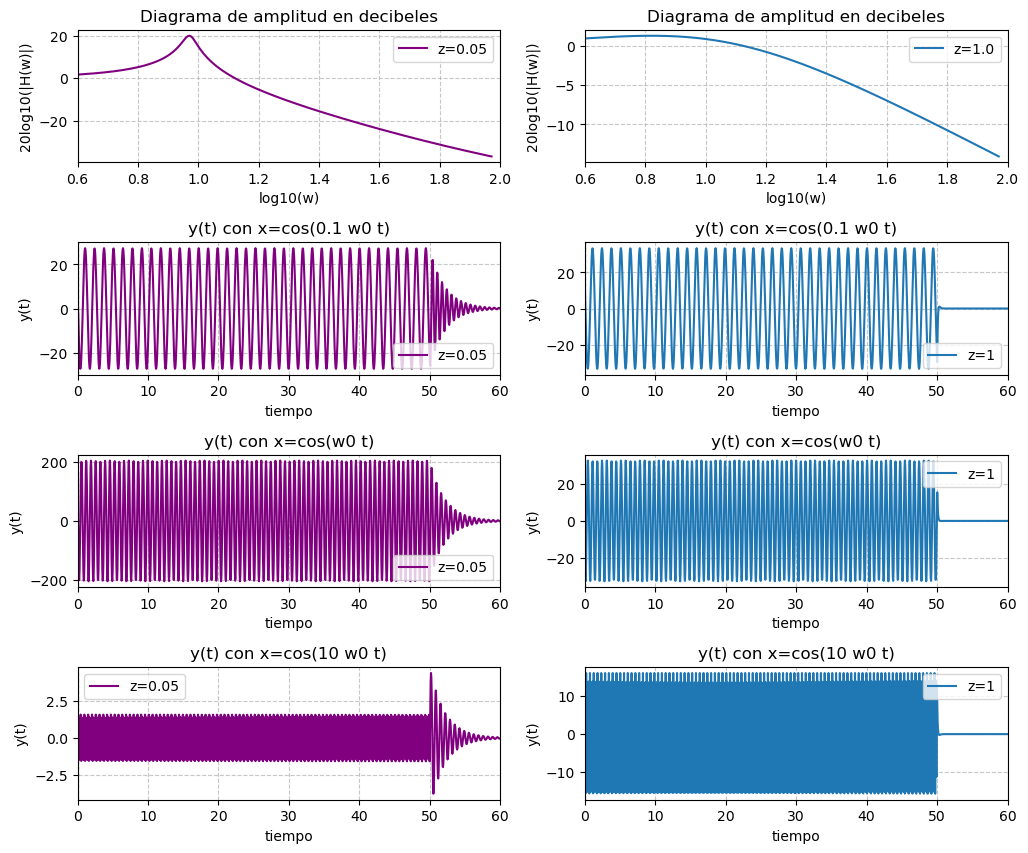

In [167]:
fig, ejes = plt.subplots(4, 2, figsize=(12, 10))
(pa,pb,p3, p0, p4, p1, p5, p2) = ejes.flatten()

pa.plot(np.log10(val_w), eje_vert1a, color='purple',label='z=0.05')
pa.axvline(0, color='black', linewidth=0.8, linestyle='--');pa.grid(True, linestyle='--', alpha=0.7)
pa.set_title('Diagrama de amplitud en decibeles');pa.set_xlim([0.6,2]);pa.legend();pa.set_xlabel('log10(w)');pa.set_ylabel('20log10(|H(w)|)')

pb.plot(np.log10(val_w), eje_vert2a, label='z=1.0')
pb.axvline(0, color='black', linewidth=0.8, linestyle='--');pb.grid(True, linestyle='--', alpha=0.7)
pb.set_title('Diagrama de amplitud en decibeles');pb.set_xlim([0.6,2]);pb.legend();pb.set_xlabel('log10(w)');pb.set_ylabel('20log10(|H(w)|)')

p0.plot(t, y_t1b, label='z=1')
p0.axvline(0, color='black', linewidth=0.8, linestyle='--');p0.grid(True, linestyle='--', alpha=0.7)
p0.set_title('y(t) con x=cos(0.1 w0 t)');p0.set_xlim([0,60]);p0.legend();p0.set_xlabel('tiempo');p0.set_ylabel('y(t)')

p1.plot(t, y_t2b, label='z=1')
p1.axvline(0, color='black', linewidth=0.8, linestyle='--');p1.grid(True, linestyle='--', alpha=0.7)
p1.set_title('y(t) con x=cos(w0 t)');p1.set_xlim([0,60]);p1.legend();p1.set_xlabel('tiempo');p1.set_ylabel('y(t)')

p2.plot(t, y_t3b, label='z=1')
p2.axvline(0, color='black', linewidth=0.8, linestyle='--');p2.grid(True, linestyle='--', alpha=0.7)
p2.set_title('y(t) con x=cos(10 w0 t)');p2.set_xlim([0,60]);p2.legend();p2.set_xlabel('tiempo');p2.set_ylabel('y(t)')

p3.plot(t, y_t1a, color='purple',label='z=0.05')
p3.axvline(0, color='black', linewidth=0.8, linestyle='--');p3.grid(True, linestyle='--', alpha=0.7)
p3.set_title('y(t) con x=cos(0.1 w0 t)');p3.set_xlim([0,60]);p3.legend();p3.set_xlabel('tiempo');p3.set_ylabel('y(t)')

p4.plot(t, y_t2a, color='purple', label='z=0.05')
p4.axvline(0, color='black', linewidth=0.8, linestyle='--');p4.grid(True, linestyle='--', alpha=0.7)
p4.set_title('y(t) con x=cos(w0 t)');p4.set_xlim([0,60]);p4.legend();p4.set_xlabel('tiempo');p4.set_ylabel('y(t)')

p5.plot(t, y_t3a, color='purple', label='z=0.05')
p5.axvline(0, color='black', linewidth=0.8, linestyle='--');p5.grid(True, linestyle='--', alpha=0.7)
p5.set_title('y(t) con x=cos(10 w0 t)');p5.set_xlim([0,60]);p5.legend();p5.set_xlabel('tiempo');p5.set_ylabel('y(t)')

plt.subplots_adjust(hspace=0.6);plt.show()